# 第9回課題

* 最終課題と同時に提出させていただいています
* 練習26~28は第8回課題と同じものです

In [1]:
from functools import lru_cache

# 練習26 combination


In [2]:
def comb(n, k, memo=None):
    if not memo:
        memo = {}
    if k == 0 or k == n:
        memo[(n, k)] = 1
    if (n, k) in memo:
        return memo[(n, k)]
    memo[(n, k)] = comb(n-1, k-1) + comb(n-1, k)
    return memo[(n, k)]

print(comb(6, 2))
print(comb(10, 7))

15
120


# 練習27 Legendre


In [3]:
def Legendre(n, p, memo=None):
    if not memo:
        memo = {}
    if n // p == 1:
        memo[n] = 1
    if n in memo:
        return memo[n]
    memo[n] = Legendre(n // p, p) + n // p
    return memo[n]

print(Legendre(1000, 5))

249


# 練習28 カントール集合


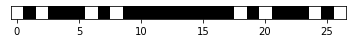

In [4]:
import matplotlib.pyplot as plt


def cantor_main(line, i, m):
    if m == 1:
        line[i] = 1
    else:
        cantor_main(line, i, m//3)
        cantor_main(line, i + m//3 * 2, m//3)


def cantor(n):
    line = [0]*(3**n)
    cantor_main(line, 0, 3**n)
    return line

plt.imshow([cantor(3)], cmap="gray")
plt.yticks([])
plt.show()

# 練習29

In [5]:
def jump(n, hp=0, memo=None):
    if hp:
        return hp - jump(n, 0, memo)
    if memo is None:
        memo = {
            0: 0,
            1: 1
        }
    if n in memo:
        return memo[n]
    d1 = 2 if n%3==0 else 1
    d2 = 2 if n%3==2 else 1
    memo[n] = min(jump(n-1, memo=memo)+d1, jump(n-2, memo=memo)+d2)
    return memo[n]

In [6]:
jump(30, 100)

80

In [7]:
def jump2(n, hp):
    assert n >= 0, "n must be a non-negative"
    @lru_cache
    def _jump(_n):
        if n < 2:
            return n
        else:
            d1 = 2 if n%3==0 else 1
            d2 = 2 if n%3==2 else 1
            return min(jump(n-1)+d1, jump(n-2)+d2)
    return hp - _jump(n)

In [8]:
jump2(30, 100)

80